# 汇总到了2的"网络直径"


In [1]:
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from networkx.algorithms import community as cmu
import itertools

# 数据读取

In [2]:
# 读取数据：若网络数据为邻接矩阵形式
# hs92 201001
df = pd.read_csv("/Users/murphy/学业/python/学习-复杂网络/数据/hs92_201001.csv",index_col = 0)

In [3]:
# 如果喜欢以国家名为节点名
# DG = nx.from_pandas_adjacency(df,create_using = nx.MultiDiGraph)

In [4]:
# 如果喜欢0、1、2...49的节点名
df = np.array(df)
DG = nx.from_numpy_array(df,create_using = nx.MultiDiGraph)

In [5]:
# 无向图版
G = nx.from_numpy_array(df)

In [6]:
# 判断是否有向
nx.is_directed(DG)
nx.is_directed(G)

False

# 直观感受

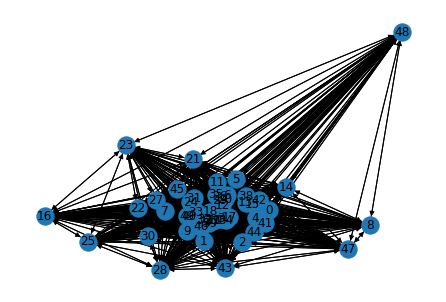

In [7]:
# 可视化,使用Kamada Kawai路径长度成本函数定位节点。
nx.draw(DG,pos=nx.kamada_kawai_layout(DG),with_labels = True)

In [8]:
# 获取邻接矩阵
As = nx.to_numpy_matrix(DG)

# 全局衡量

## 网络规模

In [9]:
# 节点数
n = len(DG.nodes)
print(n)

50


In [10]:
# 关系数
m = len(DG.edges)
print(m)

2277


<BarContainer object of 99 artists>

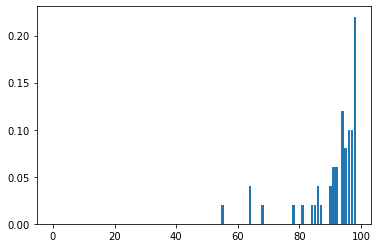

In [16]:
# 度
d = DG.degree
# 入度 出度
d_in = DG.in_degree
d_out = DG.out_degree
# 度分布
x = list(range(max(dict(d).values())+1))
d_his = nx.degree_histogram(DG)
y = [i/len(DG.nodes) for i in nx.degree_histogram(DG)]
plt.bar(x,y)

In [107]:
# 平均度
sum(d.values())/n

47.36

In [108]:
# 点点效率（距离倒数）
nx.efficiency(G, 3, 38)

0.5

In [109]:
# 平均局部效率（局部效率：某节点的邻居引起的子图的平均全局效率）
nx.local_efficiency(G)

0.9869908560009651

In [110]:
# 全局效率
nx.global_efficiency(G)

0.983265306122449

In [17]:
 # 点核度(剥洋葱）
ks = nx.core_number(G)

# 连通性

In [112]:
# 密度: m/[n（n-1）]
nx.density(DG)

0.9293877551020409

In [113]:
# 直径diameter(max距离）
nx.diameter(DG)

2

In [114]:
# 平均路径长度
nx.average_shortest_path_length(G)

1.033469387755102

In [115]:
# 一个最短路
nx.shortest_path(G,source = 3, target = 38)
# list(nx.all_shortest_paths(DG,source = 3, target = 38))

[3, 1, 38]

In [116]:
# 桥bridge
nx.bridges(G)
nx.has_bridges(G)

False

## 其他属性

In [117]:
# 互惠性 Reciprocity


-0.16078282930430693


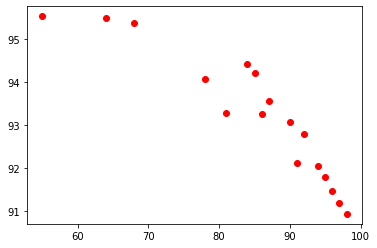

In [118]:
# 网络同配性 Assortativity
# （自己的）度（邻居的度）度相关性
nx.degree_assortativity_coefficient(DG)
print(nx.degree_assortativity_coefficient(DG))
# （自己的）度（邻居的度）度绘图
def average_nearest_neighbor_degree(G):
    k = set(G.degree(i) for i in G.nodes())
    sorted_k = sorted(k)
    k_nn_k = []
    for ki in sorted_k:
        c = 0
        k_nn_i = 0
        for i in G.nodes():
            if G.degree(i) == ki:
                k_nn_i += sum([G.degree(j) for j in list(nx.all_neighbors(G, i))]) / ki
                c += 1
        k_nn_k.append(k_nn_i / c)
    return sorted_k, k_nn_k


x1, y1 = average_nearest_neighbor_degree(DG)
plt.plot(x1, y1, 'ro')

## 网络模型

In [119]:
# 小世界 small world （聚集系数大、平均最短路径短）


In [120]:
# 无标度 free-scale network（非同质性——有核心节点）


In [121]:
# ER随机


# 节点重要性

## 局部

In [18]:
# 度中心性 Degree Centrality（邻居多少）
dc = nx.degree_centrality(DG)
dc_in = nx.in_degree_centrality(DG)
dc_out = nx.out_degree_centrality(DG)

In [20]:
# 特征向量中心性（邻居多少，及邻居的重要性）
ec = nx.eigenvector_centrality(G)

In [124]:
# 二阶中心性（二阶中心度值越低，则表明中心度越高。）
soc = nx.second_order_centrality(G)

In [125]:
# 网络排序HITS算法（分为Hub与Authority两类）
# nx.hits(DG)

In [126]:
# pagerank（有向图）
# nx.pagerank(DG)

In [127]:
# 半局部中心性（四阶邻居——度中心性是一阶邻居）


In [128]:
# 聚类系数：某一个点的邻居节点的相连程度
# 平均集聚系数
print(nx.average_clustering(G))
# 全局集聚系数
print(nx.transitivity(G))

0.9739817120019317
0.9726347859202438


## 全局影响力

In [129]:
#中介中心性 Betweeness centrality（多少最短路经过了它）
bc = nx.betweenness_centrality(DG)
# 边介数
ebc = nx.edge_betweenness_centrality(DG)

In [130]:
# 网络约束系数 Constraint：指网络成员的联系在多大程度上是冗余，如果网络较小（只有少量联系人），并且联系人之间高度连接（如在密集网络中直接连接，或通过多层级网络中各自的中央联系人间接连接），则个体的限制度通常会更高。
# 慢
# holes_constraint = nx.constraint(DG)

In [131]:
# 等级度 Hierarchy


In [132]:
# 有效规模 Effective size（非冗余联系人）
# 慢
# holes_effective = nx.effective_size(DG)

In [133]:
# 桥数 bridge number


In [134]:
# 桥接中心性 Bridging centrality
#桥接中心性区分的节点很好地位于高度连通区域之间的连接位置。桥接中心度可以区分桥接节点、流经它们的信息更多的节点以及高度连接区域之间的位置，而其他中心度度量则不能。


In [135]:
# 紧密中心性 Closeness centrality （更几何）
cc = nx.closeness_centrality(DG)

# 网络群体（社区）发现 Community detection

In [136]:
# 社区划分标准--模块度（Modularity）
# 太慢而且只能无向
# cmu_ngmc = cmu.naive_greedy_modularity_communities(G)

In [137]:
# 使用Kernighan–Lin算法将图划分为两个块。
cmu_klb = cmu.kernighan_lin_bisection(G)

In [138]:
# 该函数使用Clauset-Newman-Moore贪婪模块化最大化，找出模块化程度最大的社区划分。
cmu_gmc = cmu.greedy_modularity_communities(DG)

## 自顶向下划分

In [157]:
# G-N算法
# Girvan–Newman算法通过逐步从原始图形中删除边来检测社区。该算法在每个步骤中删除“最有价值”的边缘，传统上是具有最高中间中心性的边缘。当图被分解成碎片时，紧密结合的群落结构被暴露出来，结果可以被描绘成树枝状图。
cmu_gn = cmu.girvan_newman(DG)
k = 3
for communities in itertools.islice(cmu_gn, k):
    print(tuple(sorted(c) for c in communities))

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], [19])
([0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], [3], [19])
([0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], [3], [19], [38])


In [141]:
# K-核与K-壳（K-core & K-shell） 利用渗透法在图中寻找K族群落。
cmu_kcc = list(cmu.k_clique_communities(G,k=2))

## 自底向上划分的

In [142]:
# Fast Unfolding算法/Louvain算法
# 该算法分两个步骤进行。在第一步，它将每个节点分配到它自己的社区中，然后对于每个节点，它试图通过将每个节点移动到它的所有邻居社区来寻找最大的正模块化增益。如果没有获得正收益，则该节点保持在其原始社区中。
cmu_lc = cmu.louvain_communities(G)

In [143]:
# CPM(派系过滤算法)
cmp = list(nx.find_cliques(G))

In [144]:
# Statistical Inference


## 连路预测

In [145]:
# 共同邻居指标（Common Neighbor，CN）


In [146]:
# Admic-Adar指标（AA）


In [147]:
# 资源分配指标（Resource Allocation，RA）


In [148]:
# 局部路径指标（Local Path，LP）
